In [3]:
pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/14/03/3c854ca3e02eedf614abba4b2e177c469bf3af58207fa30d5098c5d652fe/yfinance-0.2.37-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.6/314.6 kB 1.0 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 9.6 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/

Question 1: Use yfinance to Extract Stock Data

In [3]:
import yfinance as yf

# Reset the index
tesla_data.reset_index(inplace=True)

# Save the dataframe to a CSV file
tesla_data.to_csv('tesla_data.csv', index=False)

# Display the first five rows using the head function
print(tesla_data.head())

   level_0  index       Date        Open        High         Low       Close  \
0        0      0 2022-01-03  382.583344  400.356659  378.679993  399.926666   
1        1      1 2022-01-04  396.516663  402.666656  374.350006  383.196655   
2        2      2 2022-01-05  382.216675  390.113342  360.336670  362.706665   
3        3      3 2022-01-06  359.000000  362.666656  340.166656  354.899994   
4        4      4 2022-01-07  360.123322  360.309998  336.666656  342.320007   

    Adj Close     Volume  
0  399.926666  103931400  
1  383.196655  100248300  
2  362.706665   80119800  
3  354.899994   90336600  
4  342.320007   84164700  


 Question 2: Use Webscraping to Extract Tesla Revenue Data

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL of the webpage containing Tesla revenue data
url = 'https://finance.yahoo.com/quote/TSLA/'

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content of the webpage using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Extract the table containing Tesla revenue data
table = soup.find('table')

# Convert the HTML table to a pandas dataframe
tesla_revenue = pd.read_html(str(table))[0]

# Display the last five rows of the tesla_revenue dataframe
print(tesla_revenue.tail())


               0                1
3            Ask      0.00 x 1100
4    Day's Range  192.00 - 201.78
5  52 Week Range  152.37 - 299.29
6         Volume        111461306
7    Avg. Volume        111138630


Question 3: Use yfinance to Extract Stock Data

In [11]:
# Extract GME stock data using yfinance
gme_data = yf.download('GME', start='2022-01-01', end='2022-12-31')

# Reset the index
gme_data.reset_index(inplace=True)

# Save the dataframe to a CSV file
gme_data.to_csv('gme_data.csv', index=False)

# Display the first five rows using the head function
print(gme_data.head())

[*********************100%%**********************]  1 of 1 completed

        Date       Open       High        Low      Close  Adj Close    Volume
0 2022-01-03  37.307499  39.845001  37.302502  38.209999  38.209999   5654800
1 2022-01-04  38.042500  38.247501  35.762501  37.227501  37.227501   7339600
2 2022-01-05  37.097500  37.212502  32.287498  32.342499  32.342499  13585600
3 2022-01-06  33.209999  34.424999  30.285000  32.757500  32.757500  24206000
4 2022-01-07  39.942501  40.077499  33.125000  35.154999  35.154999  48549200


Question 4: Use Webscraping to Extract GME Revenue Data

In [12]:
# Define the URL of the webpage containing GME revenue data
url = 'https://finance.yahoo.com/quote/GME?.tsrc=fin-srch'

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content of the webpage using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Extract the table containing GME revenue data
table = soup.find('table')

# Convert the HTML table to a pandas dataframe
gme_revenue = pd.read_html(str(table))[0]

# Display the last five rows of the gme_revenue dataframe
print(gme_revenue.tail())

               0              1
3            Ask    0.00 x 1000
4    Day's Range  13.20 - 13.74
5  52 Week Range  11.83 - 27.65
6         Volume        2264549
7    Avg. Volume        6114390


Question 5: Plot Tesla Stock Graph

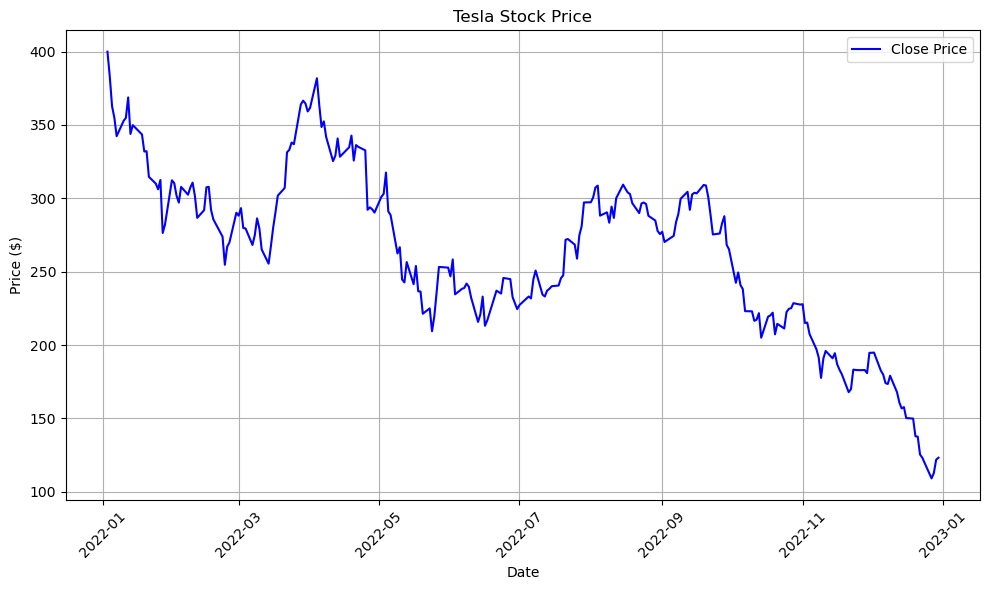

In [13]:
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Assuming tesla_data is the dataframe containing Tesla stock data
make_graph(tesla_data, title='Tesla Stock Price')

Question 6: Plot GameStop Stock Graph

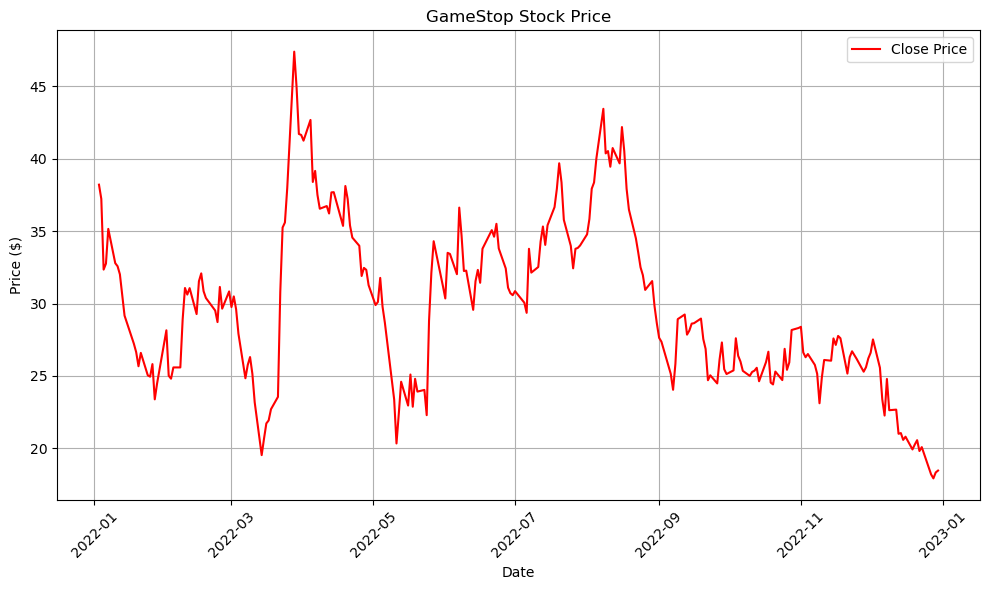

In [14]:
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='red')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Assuming gme_data is the dataframe containing GameStop stock data
make_graph(gme_data, title='GameStop Stock Price')